# Question 3: ADAM

Our example is Beale's function:

\begin{equation}
    f(x,y) = (1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2.
\end{equation}

Update rule:

\begin{equation}
    \mathbf{g}_t=\nabla_\mathbf{\theta} E(\mathbf{\theta}),
\end{equation}

\begin{equation}
    \mathbf{m}_t=\beta_1\mathbf{m}_{t-1}+(1-\beta_1)\mathbf{g}_t,
\end{equation}

\begin{equation}
    \mathbf{s}_t=\beta_2\mathbf{s}_{t-1}+(1-\beta_2)\mathbf{g}_t^2,
\end{equation}

\begin{equation}
    \hat{\mathbf{m}}_t=\frac{\mathbf{m}_t}{1-\beta_1^t},
\end{equation}

\begin{equation}
    \hat{\mathbf{s}}=\frac{\mathbf{s}_t}{1-\beta_2^t},
\end{equation}

\begin{equation}
    \mathbf{\theta}_{t+1}=\mathbf{\theta}_t-\eta_t\frac{\hat{\mathbf{m}}}{\sqrt{\hat{\mathbf{s}}_t}+\varepsilon}.
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

In [2]:
def beale(x, y):
    return (1.5 - x + x * y) ** 2 + (2.25 - x + x * y ** 2) ** 2 + (2.625 - x + x * y ** 3) ** 2

In [3]:
def beale_x(x,y):
    return 2 * (y - 1) * (1.5 - x + x * y) + 2 * (y ** 2 - 1) * (2.25 - x + x * y ** 2) + 2 * (y ** 3 - 1) * (2.625 - x + x * y ** 3)

def beale_y(x,y):
    return 2 * x * (1.5 -x +x * y) + 4 * x * y * (2.25 - x + x * y**2) + 6 * x * y**2 * (2.625 - x + x * y**3)

alpha = 0.01
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8
max_iter = 10000

def ADAM(alpha, beta_1, beta_2, epsilon, initial_params, max_iter):
    m = [[0, 0]]
    s = [[0, 0]]
    m_hat = [[0, 0]]
    s_hat = [[0, 0]]
    params = [initial_params]
    for t in range(1, max_iter + 1):
        grads = [beale_x(params[-1][0], params[-1][1]), beale_y(params[-1][0], params[-1][1])]
        m = [[beta_1 * m[0][i] + (1 - beta_1) * grads[i] for i in range(2)]]
        s = [[beta_2 * s[0][i] + (1 - beta_2) * (grads[i] ** 2) for i in range(2)]]
        m_hat = [[m[0][i] / (1 - beta_1 ** t) for i in range(2)]]
        s_hat = [[s[0][i] / (1 - beta_2 ** t) for i in range(2)]]
        params.append([params[-1][i] - alpha * m_hat[0][i] / (s_hat[0][i] ** 0.5 + epsilon) for i in range(2)])
    return params

In [4]:
# Initialise parameters
initial_params_00 = [0, 0]
initial_params_11 = [1,1]
initial_params_n11 = [-1,1]
initial_params_1n1 = [1,-1]
initial_params_n1n1 = [-1,-1]
initial_params_20 = [2,0]
initial_params_02 = [0,2]
initial_params_n20 = [-2,0]
initial_params_0n2 = [0,-2]

traj_00 = ADAM(alpha, beta_1, beta_2, epsilon, initial_params_00, max_iter)
traj_11 = ADAM(alpha, beta_1, beta_2, epsilon, initial_params_11, max_iter)
traj_n11 = ADAM(alpha, beta_1, beta_2, epsilon, initial_params_n11, max_iter)
traj_1n1 = ADAM(alpha, beta_1, beta_2, epsilon, initial_params_1n1, max_iter)
traj_n1n1 = ADAM(alpha, beta_1, beta_2, epsilon, initial_params_n1n1, max_iter)
traj_20 = ADAM(alpha, beta_1, beta_2, epsilon, initial_params_20, max_iter)
traj_02 = ADAM(alpha, beta_1, beta_2, epsilon, initial_params_02, max_iter)
traj_n20 = ADAM(alpha, beta_1, beta_2, epsilon, initial_params_n20, max_iter)
traj_0n2 = ADAM(alpha, beta_1, beta_2, epsilon, initial_params_0n2, max_iter)

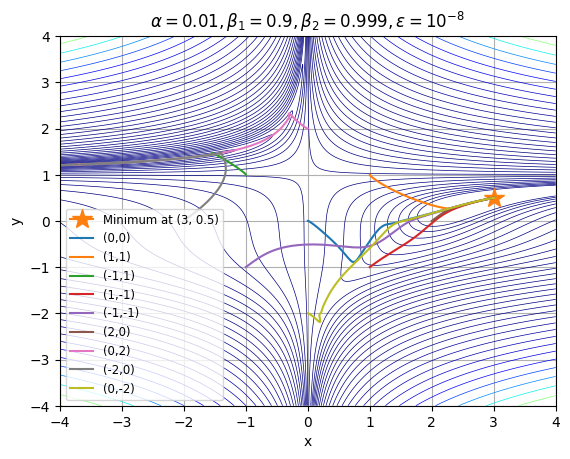

In [5]:
X, Y = np.meshgrid(np.linspace(-4, 4, 1000), np.linspace(-4, 4, 1000))
Z = beale(X, Y)
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet', linewidths=0.5, linestyles='solid')

plt.plot(3, 0.5, 'tab:orange', marker='*', markersize=15, label='Minimum at (3, 0.5)')

xs_00 = [p[0] for p in traj_00]
ys_00 = [p[1] for p in traj_00]
plt.plot(xs_00, ys_00, label='(0,0)')
xs_11 = [p[0] for p in traj_11]
ys_11 = [p[1] for p in traj_11]
plt.plot(xs_11, ys_11, label='(1,1)')
xs_n11 = [p[0] for p in traj_n11]
ys_n11 = [p[1] for p in traj_n11]
plt.plot(xs_n11, ys_n11, label='(-1,1)')
xs_1n1 = [p[0] for p in traj_1n1]
ys_1n1 = [p[1] for p in traj_1n1]
plt.plot(xs_1n1, ys_1n1, label='(1,-1)')
xs_n1n1 = [p[0] for p in traj_n1n1]
ys_n1n1 = [p[1] for p in traj_n1n1]
plt.plot(xs_n1n1, ys_n1n1, label='(-1,-1)')
xs_20 = [p[0] for p in traj_20]
ys_20 = [p[1] for p in traj_20]
plt.plot(xs_20, ys_20, label='(2,0)')
xs_02 = [p[0] for p in traj_02]
ys_02 = [p[1] for p in traj_02]
plt.plot(xs_02, ys_02, label='(0,2)')
xs_n20 = [p[0] for p in traj_n20]
ys_n20 = [p[1] for p in traj_n20]
plt.plot(xs_n20, ys_n20, label='(-2,0)')
xs_0n2 = [p[0] for p in traj_0n2]
ys_0n2 = [p[1] for p in traj_0n2]
plt.plot(xs_0n2, ys_0n2, label='(0,-2)')
plt.legend(['Minimum at (3, 0.5)', '(0,0)', '(1,1)', '(-1,1)', '(1,-1)', '(-1,-1)', '(2,0)', '(0,2)', '(-2,0)', '(0,-2)'], fontsize='small')
plt.title(r'$\alpha=0.01,\beta_1=0.9, \beta_2=0.999, \epsilon=10^{-8}$')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()